In [47]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [22]:
rv = norm(loc=1, scale=0)

In [106]:
y = []
_x = np.linspace(-5, 5, 100)
for x in _x:
    y.append(norm.logcdf(x, loc=0, scale=1))

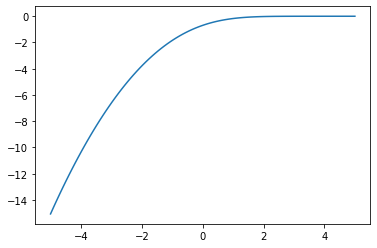

In [107]:
plt.plot(_x, y)

In [79]:
import math
x = np.array([1, 2])
sigma = np.identity(2)

a = np.array([12, 1])
b = np.array([2, 10])

d = a - b
print(x, d)

[1 2] [10 -9]


In [82]:
varAlongD = (d * sigma * d.T)[0]
print(np.sqrt(varAlongD))
meanAlongD = d.reshape(-1,).dot(x.reshape(-1,))
print(meanAlongD)
# norm.logcdf(meanAlongD, 0, np.sqrt(varAlongD))
np.log(norm.cdf(meanAlongD + 0.5, 0, np.sqrt(varAlongD)) - norm.cdf(meanAlongD - 0.5, 0, np.sqrt(varAlongD)))

[10.  0.]
-8


array([-3.54167366,         nan])

In [ ]:
norm.pdf()

In [112]:
norm(0, 1).rvs()

-0.894385450010955